In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#path to data files
path = 'Capstone1_Data'
filepath1 = os.path.join('..', path,'dataframe.csv') #if file is not in same dir as notebook, must change path
filepath2 = os.path.join('..', path,'dataframe_all_timestamps.csv') #if file is not in same dir as notebook, must change path
df = pd.read_csv(filepath1)
df_all_timestamps = pd.read_csv(filepath2)

In [3]:
#date timestamp set up 
def stringify(row):
    return str(row['publish_date']) + ' ' + str(row['publish_time'])

df_all_timestamps.loc[:,'string_date_time'] = \
                            df_all_timestamps.apply(stringify, axis=1)

df_all_timestamps.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df_all_timestamps['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')

df_all_timestamps = df_all_timestamps.drop('string_date_time', axis=1)


#make a new column in df called 'publish_timestamp' 
#that is a datetime object

df.loc[:,'string_date_time'] = df.apply(stringify, axis=1)
df.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')
df = df.drop('string_date_time', axis=1)

In [4]:
#optional
# makes new columns by taking the logarithm of the views, likes, 
#dislikes and comment_count to compress the scale for easier graphing 

import numpy as np
df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

In [5]:
ENG_df = df[df['country'].isin(['GB', 'US'])][['country','video_id','trending_date','title', 'tags', 'channel_title','category', 'category_id','log_views','log_likes','log_dislikes','log_comment_count']]
Pop_Cat_df = ENG_df[ENG_df['category'].isin(['Music', 'Entertainment', 'Howto & Style', 'People & Blog', 'Sports', 'News & Politics'])]
GB_df = Pop_Cat_df[Pop_Cat_df['country'].isin(['GB'])][['country','video_id','trending_date','title', 'tags', 'channel_title','category', 'category_id','log_views','log_likes','log_dislikes','log_comment_count']]
US_df = Pop_Cat_df[Pop_Cat_df['country'].isin(['US'])][['country','video_id','trending_date','title', 'tags', 'channel_title','category', 'category_id','log_views','log_likes','log_dislikes','log_comment_count']]


# Are all English-speaking audiences the same when it comes to content?
The question was prompted by the observation that while audiences around the world are producing content in different categories and reacting (likes, comments, dislikes) to different kinds of videos at different rates, the US and GB are very similar. So, are US and GB audiences interested in the same types of videos? Liking and disliking the same content? Perhaps even posting at the same time?

Do you need to create a separate strategy for each of these audiences if they are essentially responding in the same way?

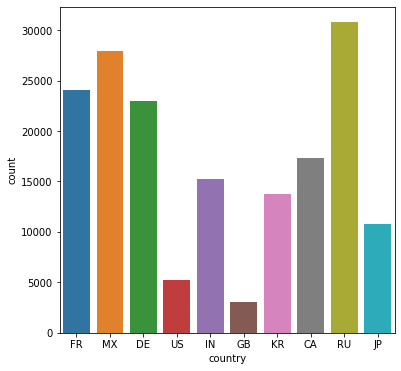

In [6]:
#Top Content producers are RU, MX, FR 
#Number of videos by country
fig = plt.figure(figsize=(6,6))
ax = sns.countplot(x="country", data=df)

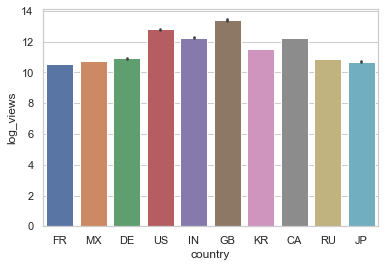

In [7]:
sns.set(style="whitegrid")
ax = sns.barplot(x="country", y="log_views", data=df)

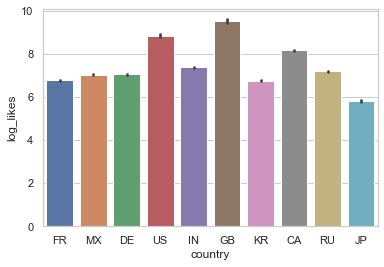

In [8]:
sns.set(style="whitegrid")
ax = sns.barplot(x="country", y="log_likes", data=df)

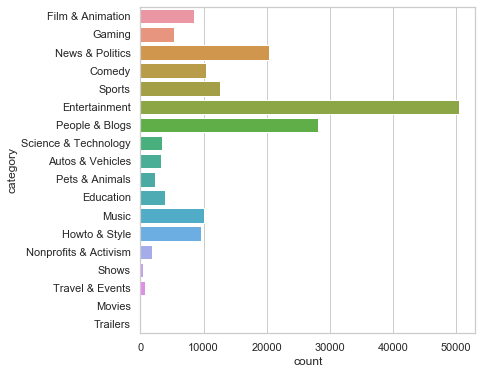

In [9]:
# Video content created and shared on YouTube fall into the following categories.
# A number of videos fall in the Entertainment, People & Blogs, News & Politics
# Number of videos by category
fig = plt.figure(figsize=(6,6))
ax = sns.countplot(y="category", data=df)

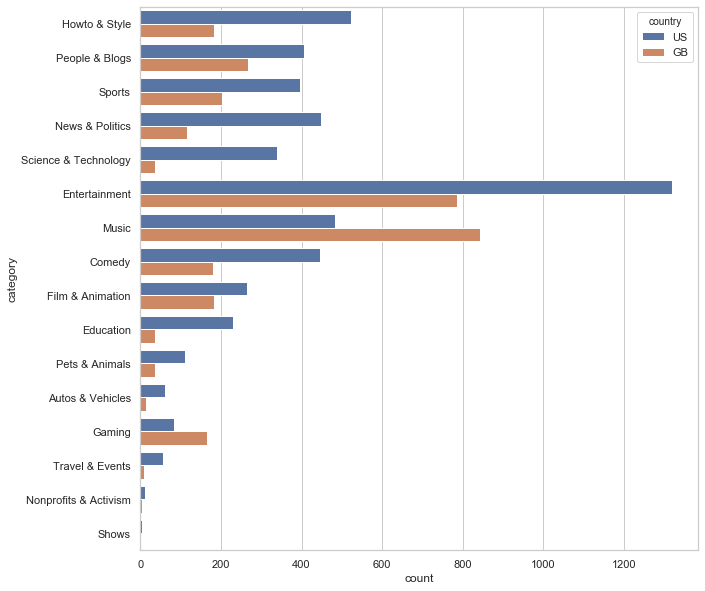

In [10]:
#Top 3 for the US: Entertainment, Music, People & Blogs
#Top 3 for the GB: Entertainment, HowTo & Style, People & Blogs
fig = plt.figure(figsize=(10,10))
ax = sns.countplot(y="category", data=ENG_df, hue= "country")

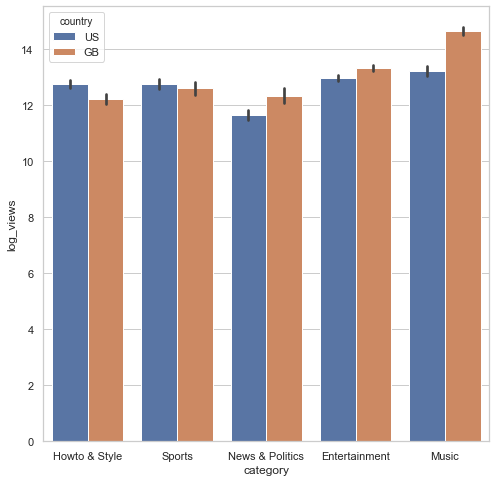

In [11]:
#vierwership by category
fig = plt.figure(figsize=(8,8))
ax = sns.barplot(x= "category", y="log_views", data=Pop_Cat_df, hue= "country")

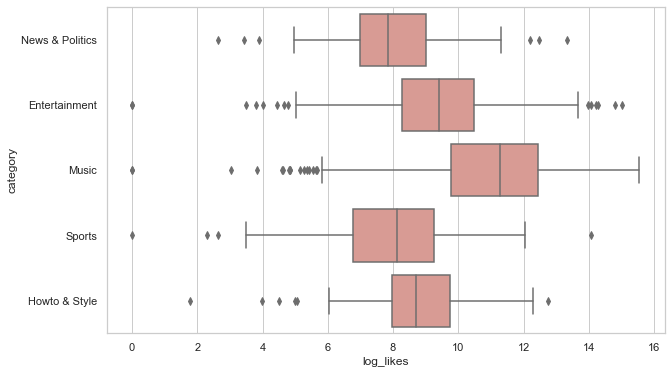

In [12]:
# GB
plt.figure(figsize = (10,6))
sns.boxplot(y = "category", x = 'log_likes', data = GB_df, color="salmon", saturation=.5)

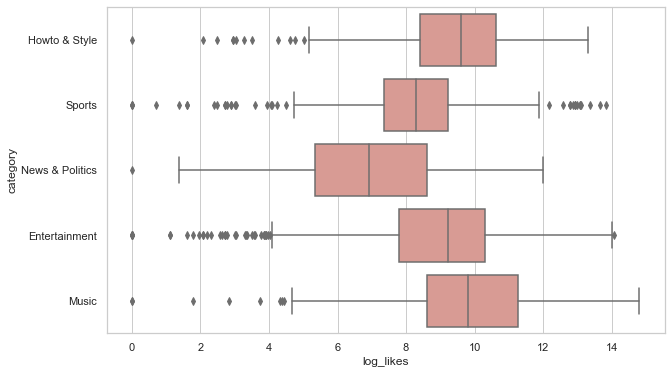

In [13]:
#US log likes
plt.figure(figsize = (10,6))
sns.boxplot(y = "category", x = 'log_likes', data = US_df, color="salmon", saturation=.5)

# Want to be Top 5 in the UK?
Unless you're a Reggaeton or rap artis, it's unlikely you'll rise to the top in the UK. The top 5 videos are all music videos in the Reggaeton and Rap genres. In the US, categories represented amongst the top 5 are Entertainment, Music, Howto & Style.

In [14]:
# TOP 5 Most viewsed in GB
GB_df_views = GB_df.sort_values(by=['log_views'], ascending=False)
GB_df_views.head()

country     video_id trending_date  \
119441      GB  _I_D_8Z4sJE    2018-04-07   
149316      GB  9jI-z9QN6g8    2018-05-18   
105767      GB  kLpH1nSLJSs    2018-03-23   
86795       GB  wfWkmURBNv8    2018-03-01   
167397      GB  VYOjWnS4cMY    2018-06-11   

                                                    title  \
119441  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...   
149316  Te Bote Remix - Casper, Nio García, Darell, Ni...   
105767               Bad Bunny - Amorfoda | Video Oficial   
86795            Ozuna x Romeo Santos - El Farsante Remix   
167397  Childish Gambino - This Is America (Official V...   

                                                     tags  \
119441  Bad Bunny|"Amorfoda"|"Dura"|"Daddy Yankee"|"Oz...   
149316  Te Bote|"Te Bote Remix"|"Flow La Movie"|"Ozuna...   
105767  Bad|"Bunny"|"Bad Bunny"|"Video Oficial"|"Music...   
86795   Ozuna|"Reggaeton"|"Odisea"|"Odisea The Album"|...   
167397  Childish Gambino|"Rap"|"This Is America"|"mcDJ...   

              channel_title category  category_id  log_views  log_likes  \
119441           NickyJamTV    Music           10  19.866514  14.851812   
149316        Flow La Movie    Music           10  19.637436  14.764060   
105767            Bad Bunny    Music           10  19.611144  15.156776   
86795                 Ozuna    Music           10  19.481286  14.296813   
167397  ChildishGambinoVEVO    Music           10  19.375121  15.510124   

        log_dislikes  log_comment_count  
119441     11.913552          11.506716  
149316     12.023051          11.640131  
105767     12.280860          12.324820  
86795      11.926015          11.119987  
167397     12.847566          13.223786

In [15]:
# TOP 5 Most viewsed in the US
US_df_views = US_df.sort_values(by=['log_views'], ascending=False)
US_df_views.head()

country     video_id trending_date  \
107016      US  -BQJo3vK8O8    2018-03-25   
146563      US  u9Mv98Gr5pY    2018-05-14   
22112       US  _9YMpuLDnwo    2017-12-11   
146586      US  rRr1qiJRsXk    2018-05-14   
169801      US  n_W54baizX8    2018-06-14   

                                                    title  \
107016              Maluma - El Préstamo (Official Video)   
146563                      VENOM - Official Trailer (HD)   
22112    42 HOLY GRAIL HACKS THAT WILL SAVE YOU A FORTUNE   
146586  Sanju | Official Teaser | Ranbir Kapoor | Rajk...   
169801               Daddy Yankee - Hielo (Video Oficial)   

                                                     tags  \
107016  Maluma Music|"Maluma Official Video"|"Maluma V...   
146563  Venom|"Venom Movie"|"Venom (2018)"|"Marvel"|"M...   
22112   5-Minute Crafts|"DIY"|"Do it yourself"|"crafts...   
146586  Sanju Teaser|"Official Teaser"|"Sanju Official...   
169801  daddy yankee reggaeton|"daddy yankee youtube"|...   

                      channel_title       category  category_id  log_views  \
107016                   MalumaVEVO          Music           10  18.284454   
146563  Sony Pictures Entertainment  Entertainment           24  17.897355   
22112               5-Minute Crafts  Howto & Style           26  17.807378   
146586                 FoxStarHindi  Entertainment           24  17.700264   
169801                 Daddy Yankee          Music           10  17.548499   

        log_likes  log_dislikes  log_comment_count  
107016  13.611397     11.177383          10.489773  
146563  14.074168     10.761365          11.848540  
22112   12.842946     11.106955          10.113748  
146586  13.606202     10.405837          10.798391  
169801  13.351667     10.665087          10.580607

# Are we watching the same channels?
Yes, pretty much. Viewers in the US and GB are watching US-based comedy shows and sports channels. In the US, sports channels such as ESPN and NBA occupy first and third place. The EllenShow is belowed by all- ranking 1st in GB and 2nd in the US.

In [16]:
ENG_df_views = ENG_df.sort_values(by=['log_views'], ascending=False)
TopENG_df = ENG_df_views[0:10000]
TopENG_channels_df = TopENG_df['channel_title'].value_counts()
TopENG_channels_df.head(20)

ESPN                                      97
TheEllenShow                              92
The Tonight Show Starring Jimmy Fallon    84
Jimmy Kimmel Live                         84
The Late Show with Stephen Colbert        83
The Late Late Show with James Corden      61
Netflix                                   60
CNN                                       58
WWE                                       57
NBA                                       57
Saturday Night Live                       57
Late Night with Seth Meyers               50
Refinery29                                41
BuzzFeedVideo                             38
Vox                                       37
INSIDER                                   36
NFL                                       33
SMTOWN                                    29
First We Feast                            29
Great Big Story                           28
Name: channel_title, dtype: int64

In [17]:
GB_channel = GB_df['channel_title'].value_counts()
GB_channel = GB_channel[0:10]
GB_channel = GB_channel.to_frame(name='Counts').reset_index()
GB_channel

index  Counts
0                          TheEllenShow      38
1                   Saturday Night Live      31
2                                   WWE      29
3    The Late Show with Stephen Colbert      28
4  The Late Late Show with James Corden      28
5                                SMTOWN      25
6                             TMZSports      22
7         Breakfast Club Power 105.1 FM      21
8                               Netflix      21
9                     Jimmy Kimmel Live      17

In [34]:
US_channel = US_df['channel_title'].value_counts()
US_channel = US_channel[0:10]
US_channel = US_channel.to_frame(name='Counts').reset_index()
US_channel

index  Counts
0                                ESPN      80
1                        TheEllenShow      54
2                                 NBA      53
3  The Late Show with Stephen Colbert      47
4                                 CNN      46
5                             Netflix      39
6                          Refinery29      36
7                   Jimmy Kimmel Live      35
8                                 Vox      33
9                                 NFL      31

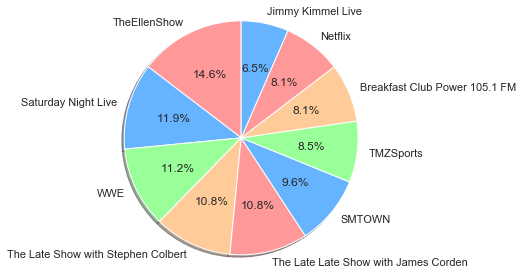

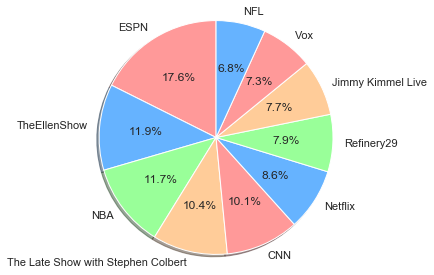

ValueError: Could not interpret input 'index'

<Figure size 576x576 with 0 Axes>

In [35]:
labels = GB_channel['index']
sizes = GB_channel['Counts']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.show()


labels = US_channel['index']
sizes = US_channel['Counts']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.show()


In [28]:
US_channel = US_df['channel_title'].value_counts()
US_channel = US_channel[0:10]
US_channel = US_channel.to_frame(name='Counts').reset_index()
US_channel

index  Counts
0                                ESPN      80
1                        TheEllenShow      54
2                                 NBA      53
3  The Late Show with Stephen Colbert      47
4                                 CNN      46
5                             Netflix      39
6                          Refinery29      36
7                   Jimmy Kimmel Live      35
8                                 Vox      33
9                                 NFL      31

In [29]:
import pandas as pd
import numpy as np
import datetime
df_dates = df[['video_id', 'trending_date', 'publish_date', 'country', 'log_views']] 
GB_dates = df_dates.loc[df_dates['country'] == 'GB', ['country','trending_date', 'publish_date', 'video_id', 'log_views']]
US_dates = df_dates.loc[df_dates['country'] == 'US', ['country','trending_date', 'publish_date', 'video_id', 'log_views']]
GB_dates['month'] = pd.DatetimeIndex(GB_dates['publish_date']).month
US_dates['month'] = pd.DatetimeIndex(US_dates['publish_date']).month

# And are we posting at the same time?

Yes, although there are slight differences. Content creators in GB are busy posting videos in October and November, exceeding the number of videos posted in another peak month - December. In the US, you see an uptick in posting in October and December but not nearly at level seen in December. 


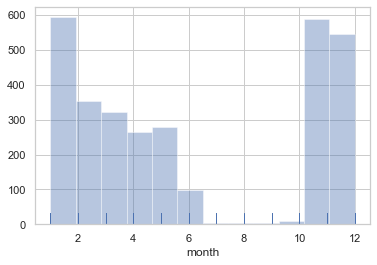

In [30]:
x = GB_dates['month']
sns.distplot(x, bins=12, kde=False, rug=True);

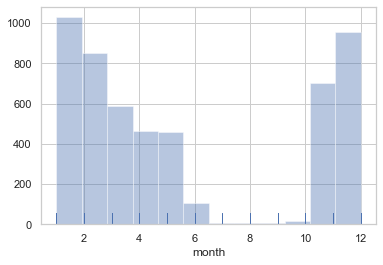

In [31]:
x = US_dates['month']
sns.distplot(x, bins=12, kde=False, rug=True);

In [ ]:
# top100cat_df = num_top100_by_category.to_frame(name='Counts').reset_index() - make into dataframe
# df_loglikes = df.sort_values(by=['log_likes'], ascending=False) - sort
# num_top100_by_country = top_video_like['country'].value_counts() - count

#boxplot
# plt.figure(figsize = (10,10))
#sns.boxplot(x = "country", y = 'log_views', data = df)

# sns bar chart
# ax = sns.countplot(y="category", data=GB_df[0:100], palette="Set3")

# GB_df = df[df['country'].isin(['GB'])][['country','video_id','title', 'channel_title','category','log_views','log_likes','log_dislikes','log_comment_count']]
# GB_df

#df.drop_duplicates()